## LInear Regression

Mean Squared Error: 0.03671012987885717


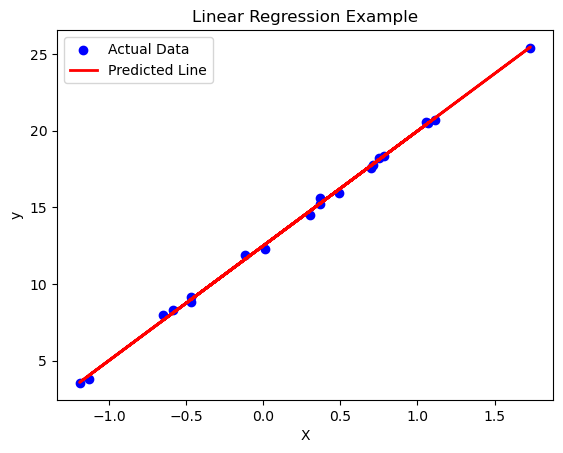

In [57]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# Create a Synthetic Dataset
# Let's create a simple linear relationship: y = 5 * x + 1 with some noise
np.random.seed(0)
X = 5 * np.random.rand(100, 1)  # 100 random values from 0 to 2
y = 5 * X + 1 + np.random.randn(100, 1) * 0.2  # Linear relation with noise

# Convert to DataFrame
data = pd.DataFrame(np.hstack((X, y)), columns=['X', 'y'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['X']], data['y'], test_size=0.2, random_state=42)

# Scale the features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Create a Linear Regression Model
model = LinearRegression()

## If the relationship between the dependent and independent variables is non-linear
# poly_features = PolynomialFeatures(degree =2)
# X_poly_train = poly_features.fit_transform(X_train)
# X_poly_test = poly_features.fit_transform(X_test)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

# Visualize the results
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Line')
plt.title('Linear Regression Example')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


## CLassification

Logistic Regression Accuracy: 1.0
Confusion Matrix: [[17  0]
 [ 0 13]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

SVM Accuracy: 1.0
Confusion Matrix: [[17  0]
 [ 0 13]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Decision Tree Accuracy: 1.0

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     

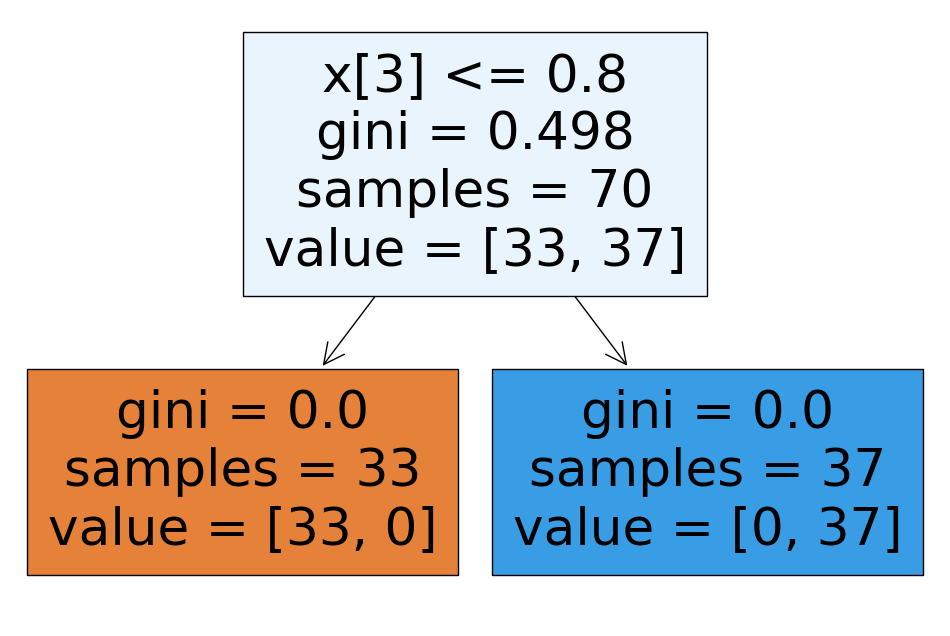

In [61]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris Dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for easier handling
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['target'] = y

# For binary classification, we will consider only two classes: 0 and 1
binary_X = iris_df[iris_df['target'] != 2].drop('target', axis=1)
binary_y = iris_df[iris_df['target'] != 2]['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(binary_X, binary_y, test_size=0.3, random_state=42)

# 1. Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)

## Regularization parameter
# logistic_model = LogisticRegression(C = 0.3)


# Print the evaluation results
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_pred))
print('Confusion Matrix:', confusion_matrix(y_test, logistic_pred))
print('Classification Report:', classification_report(y_test, logistic_pred))


# 2. Support Vector Machine (SVM)
svm_model = SVC()    
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print('Confusion Matrix:', confusion_matrix(y_test, svm_pred))
print('Classification Report:', classification_report(y_test, svm_pred))

## for non-linear data: use kernel
# svm_model = SVC(kernel='poly', degree =3)
# svm_model = SVC(kernel='rbf', gamma =3)
# svm_model = SVC(kernel='sigmoid')

# 3. Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, tree_pred))
from sklearn.tree import plot_tree
plt.figure(figsize = (12,8))
plot_tree(tree_model, filled=True)
plt.show

## max_depth parameter can be set to change the tree max height

# Classification Report
print("\nClassification Report for Decision Tree:\n", classification_report(y_test, tree_pred))
print('Confusion Matrix:', confusion_matrix(y_test, tree_pred))
print('Classification Report:', classification_report(y_test, tree_pred))

